# Linear Regression Demonstration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sklearn.linear_model import LinearRegression

## Prepare initial data

In [4]:
n = 100
x = np.arange(n)
delta = np.random.uniform(-10, 10, n)
y = 0.4*x+3+delta

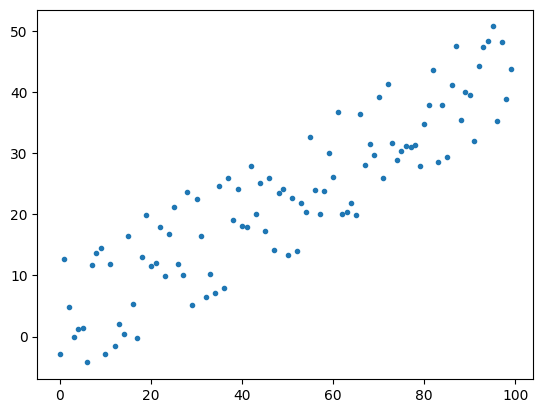

In [5]:
plt.plot(x,y, '.')

## Minimized squared Loss Error
Formula for least squared error:
$$ L = \sum_{i=1}^n (y_i-a-bx_i)^2$$
Where a and b are parameters that we're going to estimate by taking their derivtive

$$\frac{dL}{da} = -2\sum_{i=1}^ny_i-a-bx_i$$
$$\frac{dL}{db} =-2\sum_{i=1}^n(y_i-a-bx_i)x_i$$
And we need to equate these two derivatives to 0. 
Then $$a = \frac{1}{n}\sum_{i=1}^ny_i-bx_i$$
$$b = \frac{1}{\sum_{i=1}^nx_i}\sum_{i=1}^n (y_i-a)x_i$$
We could transform the above equations as: 
$$na+b\sum_{i=1}^nx_i = \sum_{i=1}^ny_i$$
$$b\sum_{i=1}^nx_i$$

In [6]:
sum_x = sum(x)
sum_y = sum(y)
sum_xy = np.dot(x,y)
sum_xx = np.dot(x,x)
A = np.array([[n, sum_x], [sum_x, sum_xx]])
b = np.array([sum_y, sum_xy])
res = np.linalg.solve(A, b)
print(res)

[2.11647862 0.4123499 ]


In [7]:
y_regres = res[1]*x+res[0]

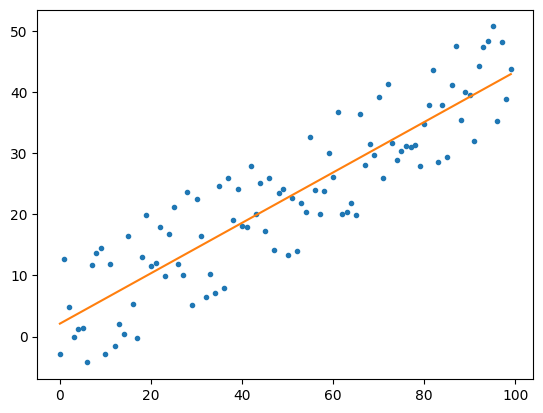

In [8]:
plt.plot(x, y, '.')
plt.plot(x, y_regres, '-')

## Calculate the root mean squared error (RMSE)
The formula of root mean squared error: 
$$RMSE = \sqrt{\frac{\sum(y-y_{pred})}{n-p}}$$
where: 
- $y$: the observed values
- $y_{pred}$: the predicted values
- $n$: number of observations
- $p$: number of estimated parameters

In [9]:
rmse = sqrt(sum((y-y_regres)**2)/(n-2))
print(rmse)

6.11144026597355


## Validate our answer with linear regression package from sklearn

In [13]:
model = LinearRegression().fit(x.reshape(-1, 1), y)
print(model.intercept_, model.coef_)

2.1164786214159506 [0.4123499]


The answers are almost the same